# **Netflix Content Analysis Report**

**Objective:**
 - Explore Netflix content to provide insighns into Movies vs TV shows,genres, countries, raeting, duration/seasons and directors

**Context:**
 - You are a Data Analyst in Netflix. The content strategy team wants insights about  content distribution, content contribution and audience preferences to guide content acquisition stretegy

**Notebook Structure**
1. Mount Google Drive and Loading dataset
2. Inspect and clean data
3. Expolatory Data Analysis (EDA)
       -Movies vs Tv Shows comparison
       -Movies Analysis
       -TV Shows Analysis
4. Insights and Recommendations

## 1.Mount Goole Drive & Load Dataset

In [1]:
# Mount google drive and datasets
import pandas as pd

In [2]:
df = pd.read_csv("datasets/netflix_titles.csv")
df.shape

(8807, 12)

# **2.Inspect & Clean Data**

In [3]:
# checking missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
# fill missing countries
df['country']= df['country'].fillna('Unknown')

In [5]:
# fill missing cast
df['cast']= df['cast'].fillna('No Cast')

In [6]:
# remove missing date_added, rating & duration
df=df.dropna(subset=['date_added','rating','duration'])

In [7]:
df['date_added'] = df['date_added'].str.strip()

# convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y")

In [8]:
# create year_added column
df['year_added']=df['date_added'].dt.year

In [9]:
# check the final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      6169 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 927.1+ KB


# **3. Explolaratory Data Analysis (EDA)**

**3.1 Movies vs Tv Shows comparison**

**Business Question:** 
    How many Movies & TV shows does netflix have and what is their propotion

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

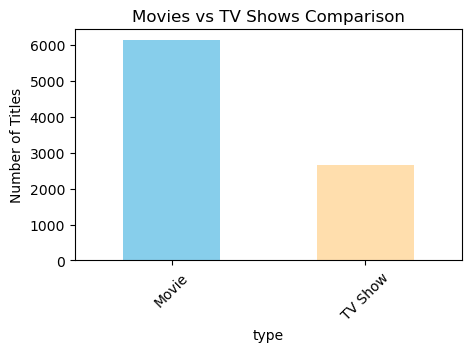

In [11]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(5,3))
type_counts.plot(kind='bar', color=['skyblue', 'navajowhite'])
plt.title('Movies vs TV Shows Comparison')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
Chart Interpretation and Descision Making

Movie have more number of titles compared to Tv show, these mean that Movie is more profitable to the company. The company should produce more movies to maintain their customers and put more efford to the TV Show for it to upgrade.
</div>
 

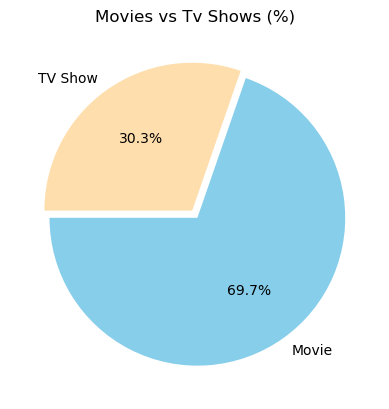

In [32]:
# Movies vs TV Shows proportions
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'navajowhite'],
    explode=[0.03,0.03],
    startangle=180
)
plt.title('Movies vs Tv Shows (%)')
plt.show()

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">

**Chart Interpretation and Descision Making**

Movie make upto 69.7% compared to TV Show, which mean that the Netflix company is investing more in Movie compare to TV Show.
The company should focus on movie since it generate more income to the company compare to TV Show.
</div>

 # **3.2. Movies Analysis**
## **3.2.1 Movies Duration**
    Business Question: What is the typical length of netflix movies, and how can this inform content planning


In [13]:
movies=df[df['type']=='Movie'].copy()

In [14]:
movies['duration'] = movies['duration'].str.replace(" min","").astype(int)

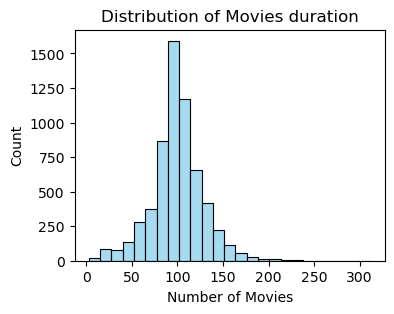

In [15]:
plt.figure(figsize=(4,3))
sns.histplot(movies['duration'], bins=25, color='skyblue')
plt.title('Distribution of Movies duration')
plt.xlabel('Number of Movies')
plt.show()

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">

**Chart Interpretation and Decision Making**

The movie with 100 minutes distribute a lot compared to the rest of movies, these mean Netflix company should continue investing in 100 minutes movies this aligns with the majority of viewers.
</div>

# **3.2.2 Movies Ratings**

**Business Question:** 
    what are the most common age ratings for netflix movies and what does this say about the target audience.

<function matplotlib.pyplot.show(close=None, block=None)>

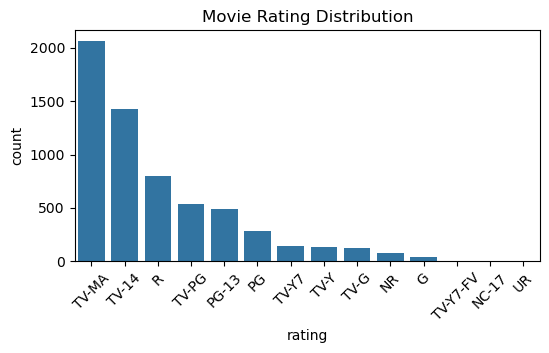

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(data=movies, x='rating', order=movies['rating'] .value_counts().index)
plt.title('Movie Rating Distribution')
plt.xticks(rotation=45)
plt.show

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">

**Chart Interpretation and Desicion Making**
    
TV-MA(Mature Audiences) is the most common rating compare to the rest. This mean the company should prioritizes TV-MA because Adult are the main subscribers who watch movies and drive engagement.
</div>

**3.2.3 Movie Genres**

**Business Question**
Which movie genres are most prevalent on Netflix, and where are the opportunities for growth

In [17]:
movies['listed_in']=movies['listed_in'].str.split(',')
movies_genre=movies.explode('listed_in')
movies_genre['listed_in']=movies_genre['listed_in'].str.strip() # Drama, Comedy



In [18]:
movies_genre['listed_in']. shape

(13185,)

In [19]:
movies_genre['listed_in'].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

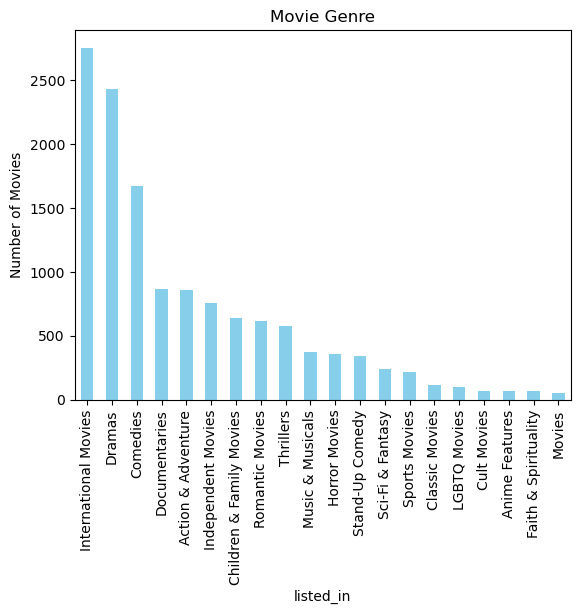

In [20]:
movies_genre['listed_in'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Movie Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">

**Chart Interpretation and Decision making**

International Movies are the most common movies genre. this mean these genre dominate because they attract the largest audiences.
    The company should produce more international Movies to invest on since they attract the largest audiences.
</div>

3.2.4 **Movie Directors**

**Business Question:**
Which directors have the most movies on Netflix, and who are the top contributord

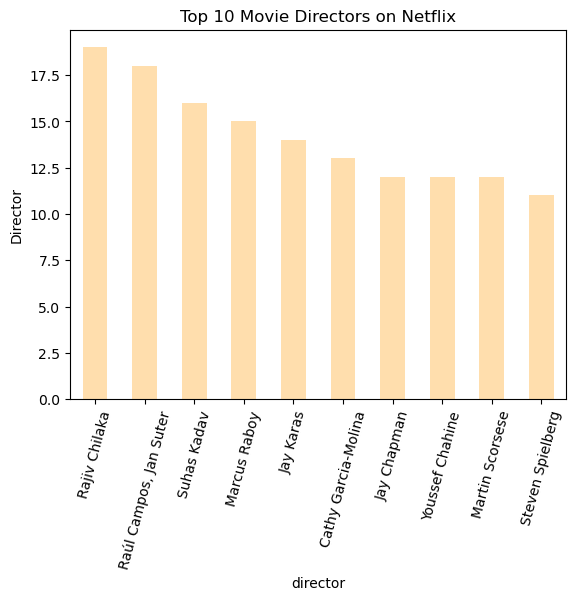

In [21]:
top_movies_directors=movies['director'].value_counts().head(10)

top_movies_directors.plot(kind='bar', color='navajowhite')
plt.title('Top 10 Movie Directors on Netflix')
plt.ylabel('Number of Movies')
plt.ylabel('Director')
plt.xticks(rotation=75)
plt.show()

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">

**Chart Interpretation and Decision Making**

Rajiv Chilaka is the top movie director, he contribute the most films. This shows that company should relies on him to produce popular content.
</div>

### **3.3 Tv Shows Analysis**

**3.3.1 Tv Shows Seasons**
> **Business Question:** How many seasons do TV Shows typically have and which are the most common

In [22]:
tv_shows=df[df['type']=='TV Show'].copy()

In [23]:
tv_shows.shape

(2664, 13)

In [24]:
tv_shows['duration']

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2664, dtype: object

In [25]:
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season','').str.replace('s','').astype(int)

In [26]:
season_counts=tv_shows['seasons'].value_counts().nlargest(5).sort_values(ascending=True)

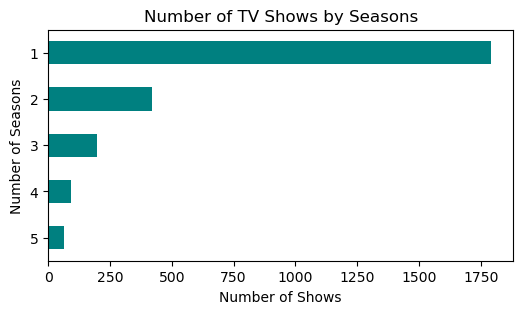

In [27]:
plt.figure(figsize=(6,3))
season_counts.plot(kind='barh', color='teal')
plt.title('Number of TV Shows by Seasons')
plt.ylabel('Number of Seasons')
plt.xlabel('Number of Shows')
plt.show()

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">

**Chart interpretation and Decision Making**

Most Netflix TV shows have 1-2 seasons, so the company should focus on short series but invest in expanding long running hits to retain viewers.
</div>

**3.3.2 Tv Show Ratings**
>**Business Question:** What are the most common age ratings for Tv Shows and does this reveal about Netflixs audience?

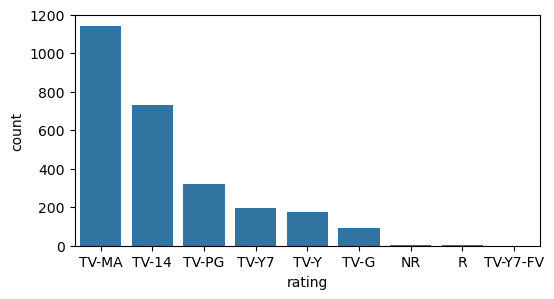

In [28]:
plt.figure(figsize=(6,3))
sns.countplot(data=tv_shows, x='rating', order=tv_shows['rating'].value_counts().index)
plt.show()

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
<strong>Chart Interpretation</strong>

TV-MA(Mature Audience) is the leading rating compare to the rest, this mean most Netflix TV shows are made for Adults and it shows that Adult are the main audiences.

<strong>Decision Making</strong>

Since Adults are the main Audience, company should produce more shows for Adults to keep them engaged.
</div>

**3.3.3 Shows Genres**
>**Business Questions:** Which TV show genres dominate Netflix, and which could be expanded?

In [29]:
tv_shows['listed_in'] = tv_shows['listed_in'].str.split(',')
tv_genre = tv_shows.explode('listed_in')
tv_genre['listed_in'] = tv_genre['listed_in'].str.strip()

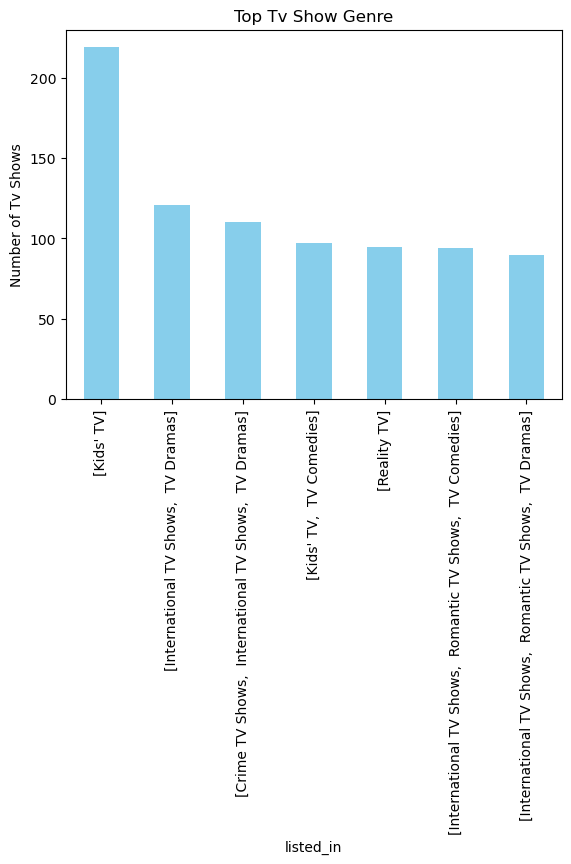

In [30]:
tv_shows['listed_in'].value_counts().head(7).plot(kind='bar', color='skyblue')
plt.title('Top Tv Show Genre')
plt.ylabel('Number of Tv Shows')
plt.show()

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
<strong>Chart interpretation</strong>

The chart shows that Kids TV is leading compare to the other, this mean that kids TV show that Netflix invests in content for young audiences becaues of high demand and views.

<strong>Decission Making</strong>

The company should offer more Kids TV shows than any other genre.
</div>

**3.3.4 Show Directors**
>**Business Question:** What directors produces the most Tv shows on Netflix, and can this influence content strategy?

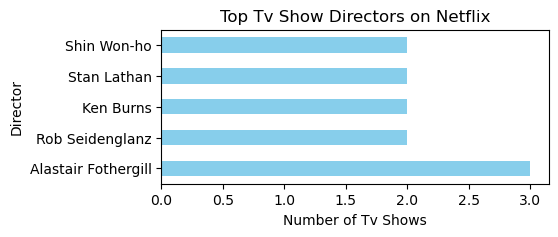

In [31]:
plt.figure(figsize=(5,2))
top_tv_directors=tv_shows['director'].value_counts().head(5)
top_tv_directors.plot(kind='barh', color='skyblue')
plt.title('Top Tv Show Directors on Netflix')
plt.ylabel('Director')
plt.xlabel('Number of Tv Shows')
plt.show()

<div style="background-color:#dcfce7; color:#14532d; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
<strong>Chart interpretation</strong>

The chart shows that only director Alastair Fothergill is responsible for directing many TV shows on Netflix. He have more experienced compare to other directors and can be trusted by the production companies.

<strong>Decission Making</strong>

Investing in director Alastair Fothergill may increase successful production.
</div>